In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Importing the ords_prods_merged_derived_aggregated_vraiables dataframe as a pickle file
ords_prods_merge = pd.read_pickle (r'C:\Users\49157\Downloads\Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_merged_derived_aggregated_variables.pkl')

In [4]:
# Checking the output
ords_prods_merge.shape

(32404859, 27)

In [5]:
ords_prods_merge.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spender_types,spender_flag,customer_frequency,frequency_flag
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,Low spender,6.367797,Low spender,20.5,Non-frequent customer
1,1,2539329,1,prior,1,2,8,NaN,14084,2,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,High spender,6.367797,Low spender,20.5,Non-frequent customer
2,2,2539329,1,prior,1,2,8,NaN,12427,3,...,Low-range product,Regularly busy,Regularly busy,Average orders,10,Low spender,6.367797,Low spender,20.5,Non-frequent customer
3,3,2539329,1,prior,1,2,8,NaN,26088,4,...,Low-range product,Regularly busy,Regularly busy,Average orders,10,Low spender,6.367797,Low spender,20.5,Non-frequent customer
4,4,2539329,1,prior,1,2,8,NaN,26405,5,...,Low-range product,Regularly busy,Regularly busy,Average orders,10,Low spender,6.367797,Low spender,20.5,Non-frequent customer


In [ ]:
#  First up, you’ll be exploring visualizations for categorical data, namely, things like histograms, bar charts, stacked bar charts, and pie charts.

<Axes: xlabel='order_dow'>

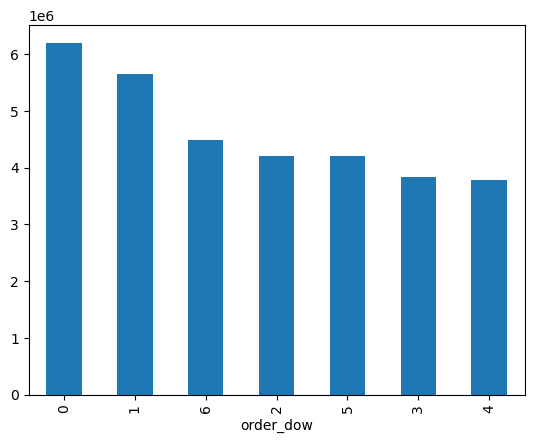

In [6]:
# Starting with creating a bar chart using the categorical data, orders_day_of_week
ords_prods_merge['order_dow'].value_counts().plot.bar()

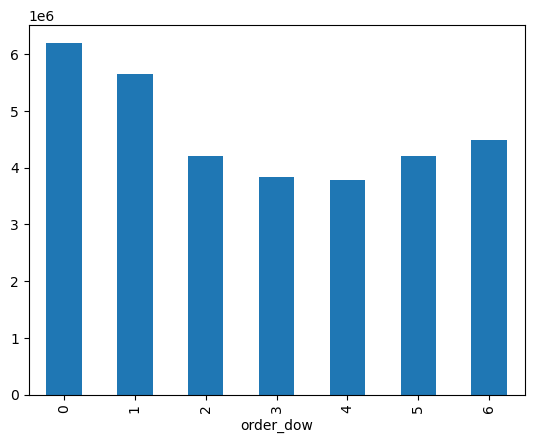

In [7]:
# Using the sort index
bar = ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

In [7]:
# This same trick can actually be used when printing frequencies
ords_prods_merge['order_dow'].value_counts()

order_dow
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [8]:
ords_prods_merge['order_dow'].value_counts().sort_index()

order_dow
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

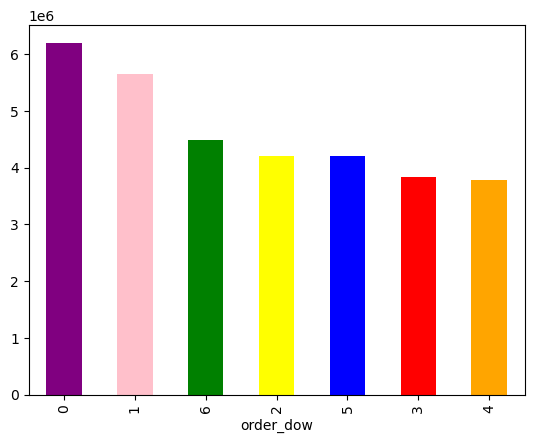

In [9]:
# Adding colors to the bar chart
bar = ords_prods_merge['order_dow'].value_counts().plot.bar(color = ['purple', 'pink', 'green', 'yellow', 'blue', 'red', 'orange'])

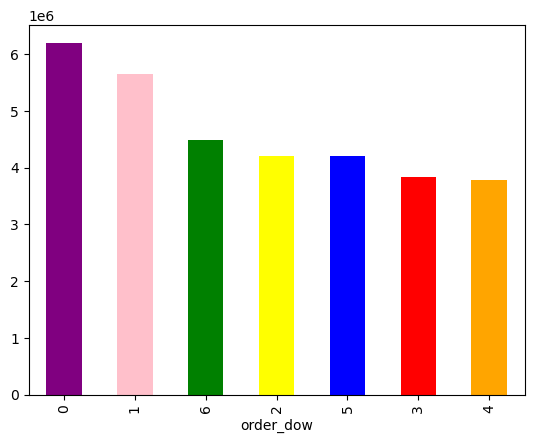

In [10]:
# Exporting charts
bar = ords_prods_merge['order_dow'].value_counts().plot.bar(color =['purple', 'pink', 'green', 'yellow', 'blue', 'red', 'orange'])

In [16]:
# Creating path
path = r'C:\Users\49157\Downloads\Instacart Basket Analysis'
path

'C:\\Users\\49157\\Downloads\\Instacart Basket Analysis'

In [17]:
# Export it outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function:

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_dow.png'))

<Axes: ylabel='Frequency'>

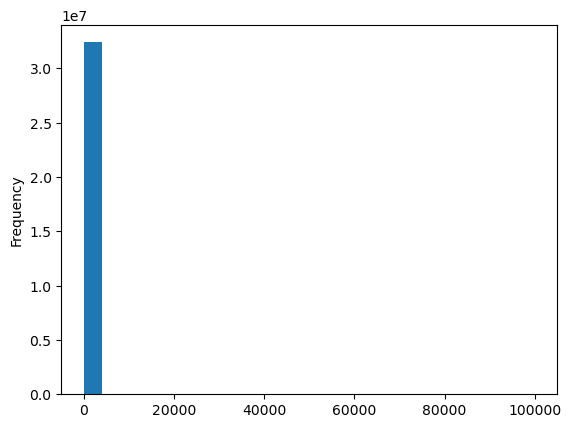

In [18]:
# Creating Histograms and Scatterplots
# bar charts are good for categorical data and histograms are more appropriate for continuous data.
# creating a histogram of the “prices” column.
ords_prods_merge['prices'].plot.hist(bins = 25)

In [11]:
# Running the describe() function against your “prices” column 
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [12]:
# conducting a few checks for each specific statistic:
ords_prods_merge['prices'].mean()

11.980225638383445

In [13]:
ords_prods_merge['prices'].median()

7.4

In [14]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

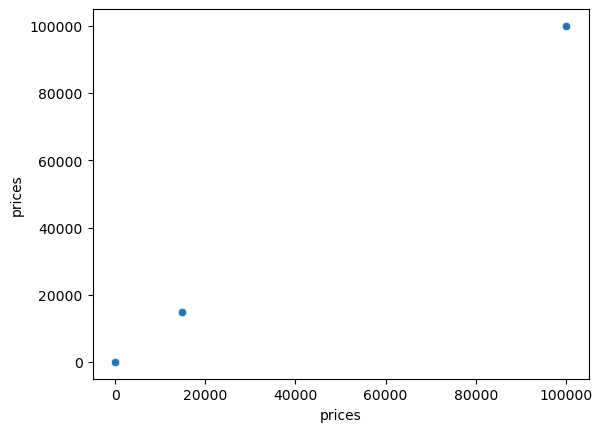

In [15]:
# Using scatterplots to investigate the relationship between two variables.
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [16]:
# Determining whether there are any values above a certain threshold in the data
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spender_types,spender_flag,customer_frequency,frequency_flag
1576,1576,912404,17,prior,12,2,14,5.0,21553,5,...,High-range product,Regularly busy,Regularly busy,Most orders,40,High spender,108.648299,High spender,5.0,Frequent customer
1638,1638,603376,17,prior,22,6,16,4.0,21553,3,...,High-range product,Regularly busy,Regularly busy,Most orders,40,High spender,108.648299,High spender,5.0,Frequent customer
16522,16522,3264360,135,prior,2,2,21,13.0,21553,6,...,High-range product,Regularly busy,Regularly busy,Fewest orders,4,High spender,1154.792308,High spender,12.0,Regular customer
16528,16528,892534,135,prior,3,0,8,12.0,21553,3,...,High-range product,Busiest day,Busiest days,Average orders,4,High spender,1154.792308,High spender,12.0,Regular customer
53672,53672,229704,342,prior,8,1,19,30.0,21553,9,...,High-range product,Regularly busy,Busiest days,Average orders,16,High spender,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,32320511,3172853,205650,prior,18,1,9,7.0,21553,17,...,High-range product,Regularly busy,Busiest days,Most orders,25,High spender,351.141618,High spender,6.0,Frequent customer
32347717,32347717,2504315,205818,prior,3,5,15,3.0,21553,13,...,High-range product,Regularly busy,Regularly busy,Most orders,25,High spender,170.073770,High spender,13.0,Regular customer
32347727,32347727,1108388,205818,prior,5,4,5,1.0,21553,5,...,High-range product,Least busy,Slowest days,Fewest orders,25,High spender,170.073770,High spender,13.0,Regular customer
32380527,32380527,1916142,206049,prior,1,2,17,NaN,21553,2,...,High-range product,Regularly busy,Regularly busy,Average orders,5,High spender,938.031250,High spender,7.0,Frequent customer


In [17]:
# For now, let’s mark them as missing since they don’t make sense in terms of the other values in the column. To turn them into NaNs, we run the following code
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [18]:
# Once finished,  we check whether the replacement was successful by running a max-value check on your “prices” column with the following syntax
ords_prods_merge['prices'].max()

25.0

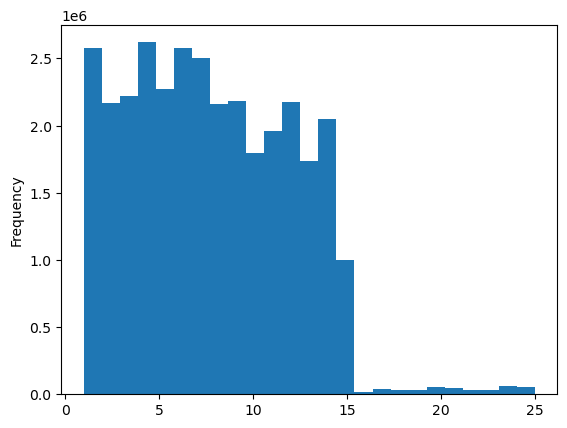

In [19]:
# After replacing the outliers with 25, we retry the histogram on our “prices” column:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

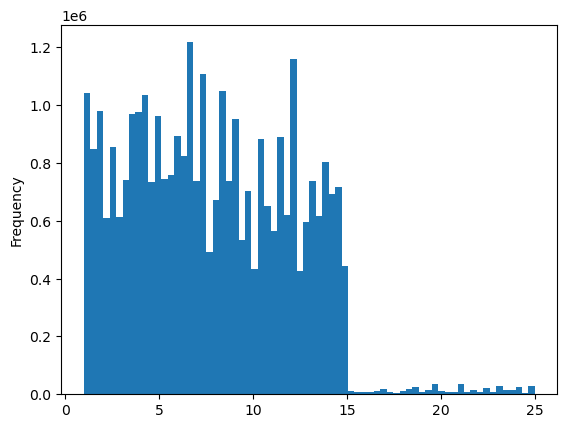

In [20]:
# Increasing the level of granularity in the histogram, by increasing the number of bins to 70. 
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [22]:
# Creating path
path = r'C:\Users\49157\Downloads\Instacart Basket Analysis'
path

'C:\\Users\\49157\\Downloads\\Instacart Basket Analysis'

In [23]:
# Exporting the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [24]:
# Creating line charts to see the development of the “prices” column across the days of the week.
# We are plotting the “order-dow” column on the x-axis and the “prices” column on the y-axis 
# Create a random sample by generating a seed
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [ ]:
# Creating a list holding True/False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [28]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [29]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [ ]:
# If big is 70 percent and small is 30 percent of ords_prods_merge, we would get the same numbers of rows as your original ords_prods_merge dataframe if you added the rows of both samples together  

In [26]:
len(ords_prods_merge)

32404859

In [30]:
len (big) + len (small)

32404859

In [32]:
# Reducing samples to only those columns necessary for the chart, namely “prices” and “order_dow.”
df_2 = small[['order_dow','prices']]

C:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\49157\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


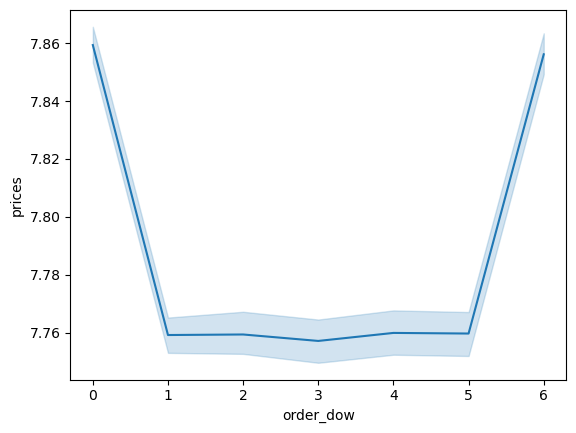

In [33]:
# Finally creating a line chart to see the development of the “prices” column across the days of the week
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

In [34]:
# Exporting the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_order_dow.png'))